<a href="https://colab.research.google.com/github/GiselyKCosta/Challenge_Alura_Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [17]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Descritivas
 ## Média de vendas
media_L1 = np.mean(loja1["Preço"])
media_L2 = np.mean(loja2["Preço"])
media_L3 = np.mean(loja3["Preço"])
media_L4 = np.mean(loja4["Preço"])


 ## Faturamento Bruto por loja
soma_L1 = loja1["Preço"].sum()
soma_L2 = loja2["Preço"].sum()
soma_L3 = loja3["Preço"].sum()
soma_L4 = loja4["Preço"].sum()



## Faturamento Liquido por loja
Frete_L1 = loja1["Frete"].sum()
Frete_L2 = loja2["Frete"].sum()
Frete_L3 = loja3["Frete"].sum()
Frete_L4 = loja4["Frete"].sum()

fat_Liq_L1 = soma_L1-Frete_L1
fat_Liq_L2 = soma_L2-Frete_L2
fat_Liq_L3 = soma_L3-Frete_L3
fat_Liq_L4 = soma_L4-Frete_L4

In [135]:
tabela_descritivas = pd.DataFrame({
    "Loja 1": loja1["Preço"].describe(),
    "Loja 2": loja2["Preço"].describe(),
    "Loja 3": loja3["Preço"].describe(),
    "Loja 4": loja4["Preço"].describe()
})
tabela_descritivas = tabela_descritivas.round(2)
novos_nomes = {
    "count": "Contagem",
    "mean": "Média",
    "std": "Desvio Padrão",
    "min": "Mínimo",
    "25%": "1º Quartil",
    "50%": "Mediana",
    "75%": "3º Quartil",
    "max": "Máximo"
}

tabela_descritivas = tabela_descritivas.rename(index=novos_nomes)
tabela_descritivas

,Loja 1,Loja 2,Loja 3,Loja 4
Contagem,2359.00,2359.00,2359.00,2358.00
Média,650.49,630.97,620.61,587.15
Desvio Padrão,819.58,794.08,774.19,758.34
Mínimo,10.07,10.16,10.08,10.17
1º Quartil,74.34,72.73,76.56,71.22
Mediana,313.75,290.96,301.67,279.32
3º Quartil,904.13,903.58,888.04,845.58
Máximo,3969.38,3937.85,3957.62,3869.56


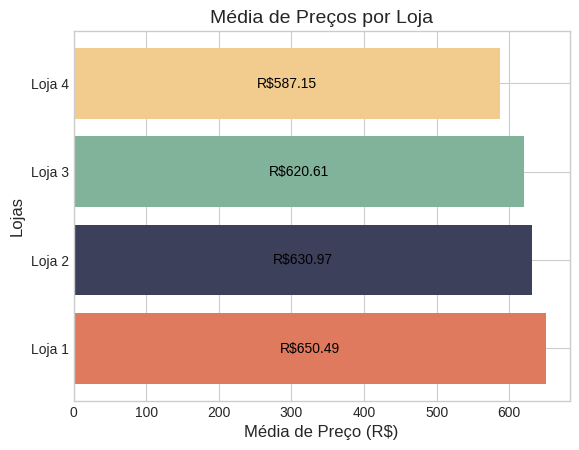

In [136]:
## Plot Média de preços
medias = [media_L1, media_L2, media_L3, media_L4]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
cores_lojas=['#e07a5f', '#3d405b', '#81b29a', '#f2cc8f']
plt.barh(lojas, medias, color=cores_lojas)

plt.title("Média de Preços por Loja", fontsize=14)
plt.ylabel("Lojas", fontsize=12)
plt.xlabel("Média de Preço (R$)", fontsize=12)

for i, media in enumerate(medias):
  plt.text (media / 2, i, f"R${media:.2f}", ha='center', va='center', color='black')

plt.show()


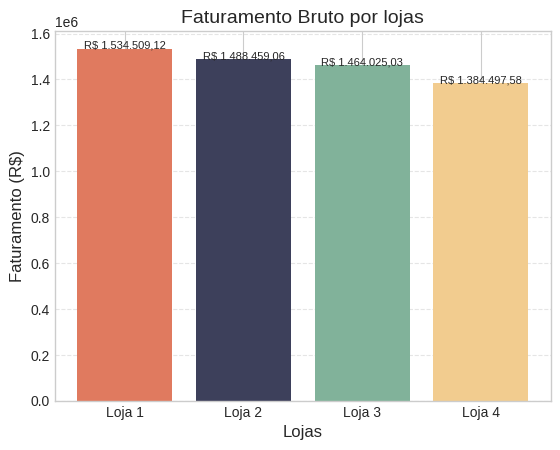

In [137]:
## Plot Faturamento Bruto
somas = [soma_L1,soma_L2,soma_L3,soma_L4]
plt.bar (lojas, somas, color= cores_lojas)
plt.title('Faturamento Bruto por lojas', fontsize=14)
plt.xlabel('Lojas', fontsize = 12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha = 0.5)

for i, soma in enumerate(somas):
    valor_formatado = f"{soma:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    plt.text(i, soma + 0.5, f"R$ {valor_formatado}", ha='center', fontsize=8)
plt.show()

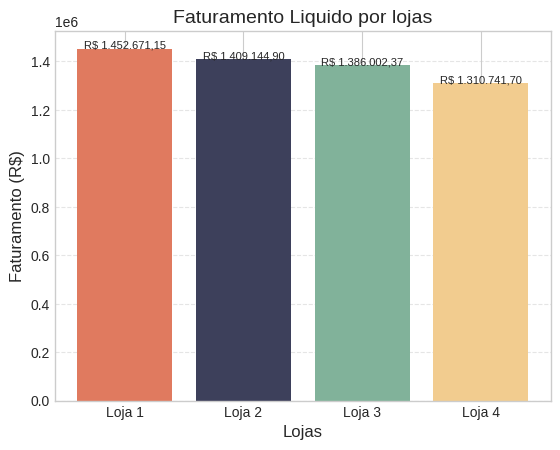

In [138]:
## Plot Faturamento Liquido
faturamento = [fat_Liq_L1,fat_Liq_L2,fat_Liq_L3,fat_Liq_L4]
plt.bar (lojas, faturamento, color=cores_lojas)
plt.title('Faturamento Liquido por lojas', fontsize=14)
plt.xlabel('Lojas', fontsize = 12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha = 0.5)

for i, fat in enumerate(faturamento):
    valor_formatado = f"{fat:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    plt.text(i, fat + 0.5, f"R$ {valor_formatado}", ha='center', fontsize=8)
plt.show()

# 2. Vendas por Categoria


In [139]:
contagem_por_categoria = pd.DataFrame({
    "Loja 1": loja1.groupby("Categoria do Produto")["Preço"].count(),
    "Loja 2": loja2.groupby("Categoria do Produto")["Preço"].count(),
    "Loja 3": loja3.groupby("Categoria do Produto")["Preço"].count(),
    "Loja 4": loja4.groupby("Categoria do Produto")["Preço"].count()
})


media_por_categoria = pd.DataFrame({
    "Loja 1": loja1.groupby("Categoria do Produto")["Preço"].mean(),
    "Loja 2": loja2.groupby("Categoria do Produto")["Preço"].mean(),
    "Loja 3": loja3.groupby("Categoria do Produto")["Preço"].mean(),
    "Loja 4": loja4.groupby("Categoria do Produto")["Preço"].mean()
})

print(media_por_categoria)
print(contagem_por_categoria)


                            Loja 1       Loja 2       Loja 3       Loja 4
Categoria do Produto                                                     
brinquedos               74.054877    67.930383    82.124444    79.928018
eletrodomesticos       1554.209487  1523.797148  1579.082338  1486.931693
eletronicos            1278.257210  1298.041967  1214.412239  1210.569534
esporte e lazer         184.463204   168.458509   171.321661   160.525812
instrumentos musicais   668.855440   624.942098   582.906497   589.038235
livros                   67.710520    68.296193    68.457838    66.458663
moveis                  538.017441   532.205158   537.265651   534.803437
utilidades domesticas    99.014503   108.634586   113.447514    99.994179
                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     45

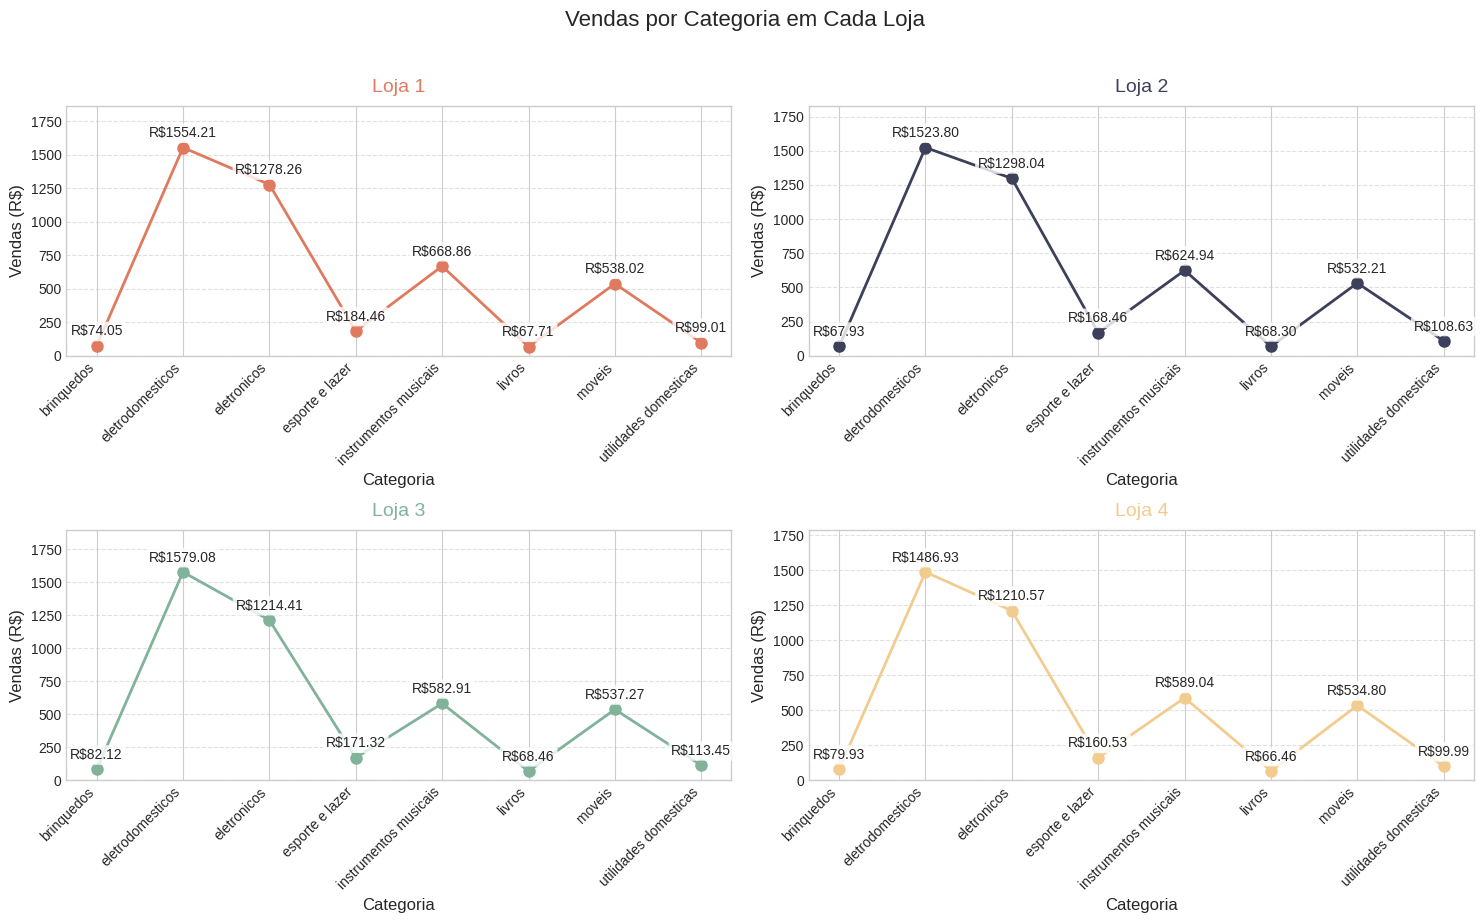

In [140]:
import matplotlib.pyplot as plt
import numpy as np


categorias = media_por_categoria.index
lojas = media_por_categoria.columns
cores = ['#e07a5f', '#3d405b', '#81b29a', '#f2cc8f']


fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle('Vendas por Categoria em Cada Loja', fontsize=16, y=1.02)

plt.subplots_adjust(hspace=0.3, wspace=0.2)


for i, (ax, loja) in enumerate(zip(axes.flatten(), lojas)):

    dados = media_por_categoria[loja]


    ax.plot(
        categorias,
        dados,
        marker='o',
        markersize=8,
        linewidth=2,
        color=cores[i],
        label=loja
    )


    ax.set_title(loja, fontsize=14, pad=10, color=cores[i])
    ax.set_xlabel('Categoria', fontsize=12)
    ax.set_ylabel('Vendas (R$)', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    for j, (categoria, valor) in enumerate(zip(categorias, dados)):
        ax.text(
            j,
            valor + (0.05 * dados.max()),
            f'R${valor:.2f}',
            ha='center',
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
        )


    ax.set_ylim(0, dados.max() * 1.2)
    ax.set_xticks(range(len(categorias)))
    ax.set_xticklabels(categorias, rotation=45, ha='right')


for j in range(i+1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

In [115]:
# % das categorias
loja_cat_per = contagem_por_categoria.div(contagem_por_categoria.sum(axis=0)) * 100  # axis=0: soma por coluna (loja)

print(loja_cat_per.round(2))

                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos              13.73   13.27   13.35   14.33
eletrodomesticos        13.23   12.93   11.78   10.77
eletronicos             18.99   17.89   19.12   19.13
esporte e lazer         12.04   11.66   11.74   11.75
instrumentos musicais    7.72    9.50    7.50    7.21
livros                   7.33    8.35    7.84    7.93
moveis                  19.71   18.74   21.15   20.36
utilidades domesticas    7.25    7.67    7.50    8.52


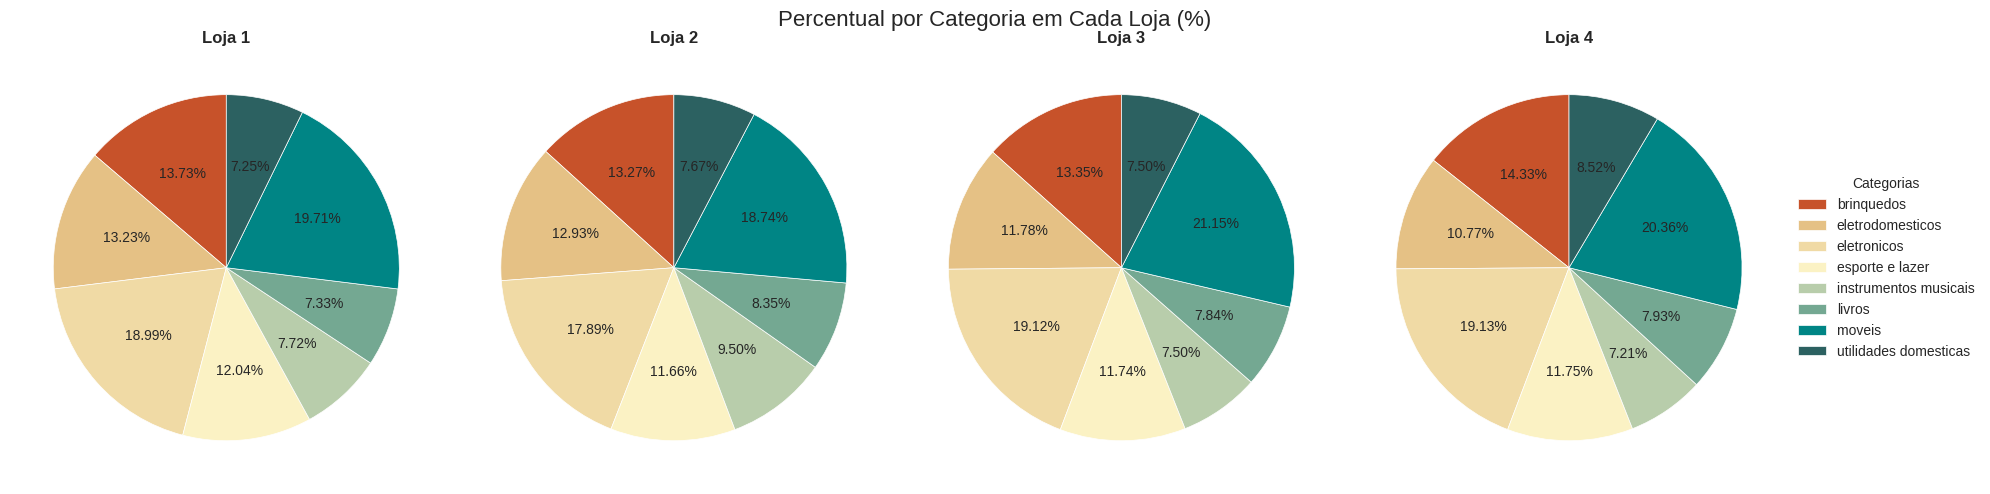

In [116]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
cores = ['#c7522a', '#e5c185', '#f0daa5', '#fbf2c4', '#b8cdab', '#74a892', '#008585', '#2c6161']


for i, loja in enumerate(loja_cat_per.columns):
    dados = loja_cat_per[loja]
    wedges, texts, autotexts = axes[i].pie(
        dados,
        labels=None,
        autopct='%1.2f%%',
        startangle=90,
        colors=cores[:len(dados)],
        wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},
        textprops={'fontsize': 10}
    )

    axes[i].set_title(loja, fontweight="bold")

axes[i].legend(
  wedges,
  dados.index,
  title="Categorias",
  loc="center left",
  bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.suptitle("Percentual por Categoria em Cada Loja (%)", fontsize=16)
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

avaliacao_loja = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média_Avaliação': [
        loja1["Avaliação da compra"].mean(),
        loja2["Avaliação da compra"].mean(),
        loja3["Avaliação da compra"].mean(),
        loja4["Avaliação da compra"].mean()
    ],
    'Contagem_Avaliações': [
        len(loja1),
        len(loja2),
        len(loja3),
        len(loja4)
    ]
}).round(2)

print(avaliacao_loja)

     Loja  Média_Avaliação  Contagem_Avaliações
0  Loja 1             3.98                 2359
1  Loja 2             4.04                 2359
2  Loja 3             4.05                 2359
3  Loja 4             4.00                 2358


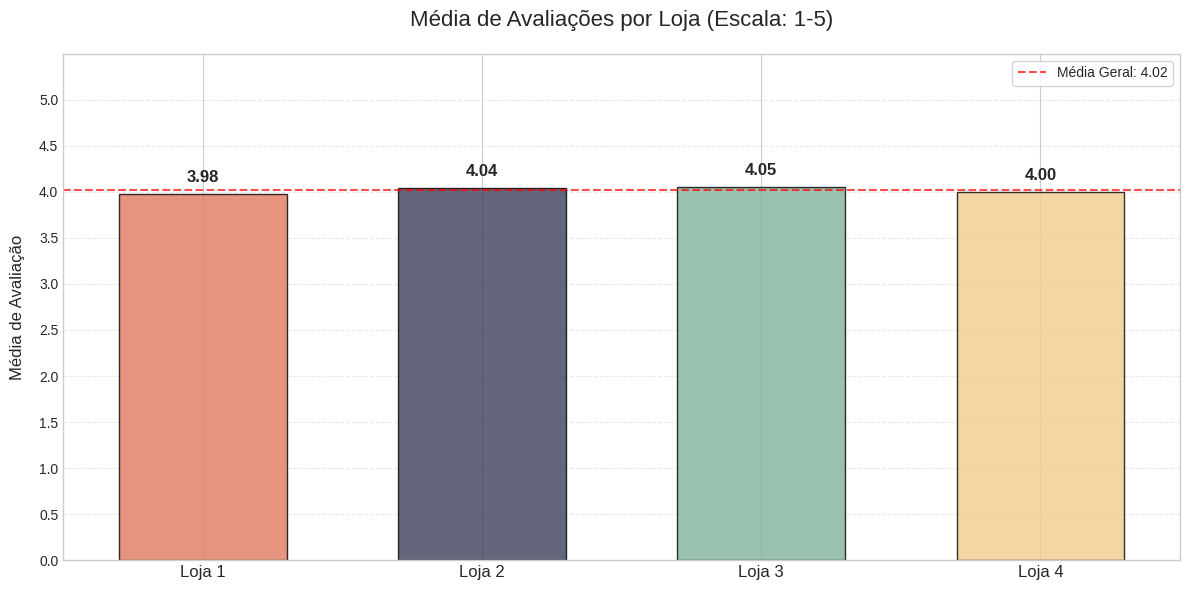

In [98]:

lojas = avaliacao_loja.index
medias = avaliacao_loja['Média_Avaliação']
contagens = avaliacao_loja['Contagem_Avaliações']
media_geral = medias.mean()


plt.figure(figsize=(12, 6))
bar_width = 0.6
x_pos = np.arange(len(lojas))


cores = cores_lojas

bars = plt.bar(
    x_pos,
    medias,
    width=bar_width,
    color=cores,
    edgecolor='black',
    linewidth=1,
    alpha=0.8
)


plt.axhline(
    media_geral,
    color='red',
    linestyle='--',
    linewidth=1.5,
    alpha=0.7,
    label=f'Média Geral: {media_geral:.2f}'
)


for i, (media, contagem) in enumerate(zip(medias, contagens)):
    plt.text(
        x_pos[i],
        media + 0.1,
        f'{media:.2f}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )



plt.xticks(x_pos, avaliacao_loja['Loja'], fontsize=12)
plt.xlim(-0.5, len(lojas)-0.5)


plt.ylabel('Média de Avaliação', fontsize=12, labelpad=10)
plt.ylim(0, 5.5)
plt.yticks(np.arange(0, 5.5, 0.5), fontsize=10)


plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.title('Média de Avaliações por Loja (Escala: 1-5)', fontsize=16, pad=20)
plt.legend(loc='upper right', frameon=True)

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [145]:
# LOJA 1
vendas_por_produto1 = loja1['Produto'].value_counts().reset_index()
vendas_por_produto1.columns = ['Produto', 'Quantidade_Vendida']
mais_vendido1 = vendas_por_produto1.iloc[0]['Produto']
qtd_mais1 = vendas_por_produto1.iloc[0]['Quantidade_Vendida']
categoria_mais1 = loja1[loja1['Produto'] == mais_vendido1]['Categoria do Produto'].iloc[0]
menos_vendido1 = vendas_por_produto1.iloc[-1]['Produto']
qtd_menos1 = vendas_por_produto1.iloc[-1]['Quantidade_Vendida']
categoria_menos1 = loja1[loja1['Produto'] == menos_vendido1]['Categoria do Produto'].iloc[0]

# LOJA 2
vendas_por_produto2 = loja2['Produto'].value_counts().reset_index()
vendas_por_produto2.columns = ['Produto', 'Quantidade_Vendida']
mais_vendido2 = vendas_por_produto2.iloc[0]['Produto']
qtd_mais2 = vendas_por_produto2.iloc[0]['Quantidade_Vendida']
categoria_mais2 = loja2[loja2['Produto'] == mais_vendido2]['Categoria do Produto'].iloc[0]
menos_vendido2 = vendas_por_produto2.iloc[-1]['Produto']
qtd_menos2 = vendas_por_produto2.iloc[-1]['Quantidade_Vendida']
categoria_menos2 = loja2[loja2['Produto'] == menos_vendido2]['Categoria do Produto'].iloc[0]

# LOJA 3
vendas_por_produto3 = loja3['Produto'].value_counts().reset_index()
vendas_por_produto3.columns = ['Produto', 'Quantidade_Vendida']
mais_vendido3 = vendas_por_produto3.iloc[0]['Produto']
qtd_mais3 = vendas_por_produto3.iloc[0]['Quantidade_Vendida']
categoria_mais3 = loja3[loja3['Produto'] == mais_vendido3]['Categoria do Produto'].iloc[0]
menos_vendido3 = vendas_por_produto3.iloc[-1]['Produto']
qtd_menos3 = vendas_por_produto3.iloc[-1]['Quantidade_Vendida']
categoria_menos3 = loja3[loja3['Produto'] == menos_vendido3]['Categoria do Produto'].iloc[0]

# LOJA 4
vendas_por_produto4 = loja4['Produto'].value_counts().reset_index()
vendas_por_produto4.columns = ['Produto', 'Quantidade_Vendida']
mais_vendido4 = vendas_por_produto4.iloc[0]['Produto']
qtd_mais4 = vendas_por_produto4.iloc[0]['Quantidade_Vendida']
categoria_mais4 = loja4[loja4['Produto'] == mais_vendido4]['Categoria do Produto'].iloc[0]
menos_vendido4 = vendas_por_produto4.iloc[-1]['Produto']
qtd_menos4 = vendas_por_produto4.iloc[-1]['Quantidade_Vendida']
categoria_menos4 = loja4[loja4['Produto'] == menos_vendido4]['Categoria do Produto'].iloc[0]

# DataFrame final
mais_e_menos_vendidos = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Mais_Vendido_Produto': [mais_vendido1, mais_vendido2, mais_vendido3, mais_vendido4],
    'Categoria_Mais_Vendido': [categoria_mais1, categoria_mais2, categoria_mais3, categoria_mais4],
    'Qtd_Mais_Vendido': [qtd_mais1, qtd_mais2, qtd_mais3, qtd_mais4],
    'Menos_Vendido_Produto': [menos_vendido1, menos_vendido2, menos_vendido3, menos_vendido4],
    'Categoria_Menos_Vendido': [categoria_menos1, categoria_menos2, categoria_menos3, categoria_menos4],
    'Qtd_Menos_Vendido': [qtd_menos1, qtd_menos2, qtd_menos3, qtd_menos4]
})

mais_e_menos_vendidos

,Loja,Mais_Vendido_Produto,Categoria_Mais_Vendido,Qtd_Mais_Vendido,Menos_Vendido_Produto,Categoria_Menos_Vendido,Qtd_Menos_Vendido
0,Loja 1,Micro-ondas,eletrodomesticos,60,Celular ABXY,eletronicos,33
1,Loja 2,Iniciando em programação,livros,65,Jogo de tabuleiro,brinquedos,32
2,Loja 3,Kit banquetas,moveis,57,Blocos de montar,brinquedos,35
3,Loja 4,Cama box,moveis,62,Guitarra,instrumentos musicais,33


In [144]:
resultado_formatado = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Mais Vendido': [
        f"{mais_vendido1} ({categoria_mais1}, {qtd_mais1} un.)",
        f"{mais_vendido2} ({categoria_mais2}, {qtd_mais2} un.)",
        f"{mais_vendido3} ({categoria_mais3}, {qtd_mais3} un.)",
        f"{mais_vendido4} ({categoria_mais4}, {qtd_mais4} un.)"
    ],
    'Menos Vendido': [
        f"{menos_vendido1} ({categoria_menos1}, {qtd_menos1} un.)",
        f"{menos_vendido2} ({categoria_menos2}, {qtd_menos2} un.)",
        f"{menos_vendido3} ({categoria_menos3}, {qtd_menos3} un.)",
        f"{menos_vendido4} ({categoria_menos4}, {qtd_menos4} un.)"
    ]
})

display(resultado_formatado)

,Loja,Mais Vendido,Menos Vendido
0,Loja 1,"Micro-ondas (eletrodomesticos, 60 un.)","Celular ABXY (eletronicos, 33 un.)"
1,Loja 2,"Iniciando em programação (livros, 65 un.)","Jogo de tabuleiro (brinquedos, 32 un.)"
2,Loja 3,"Kit banquetas (moveis, 57 un.)","Blocos de montar (brinquedos, 35 un.)"
3,Loja 4,"Cama box (moveis, 62 un.)","Guitarra (instrumentos musicais, 33 un.)"


# 5. Frete Médio por Loja


In [24]:
Frete_media_L1 = loja1["Frete"].mean()
Frete_media_L2 = loja2["Frete"].mean()
Frete_media_L3 = loja3["Frete"].mean()
Frete_media_L4 = loja4["Frete"].mean()

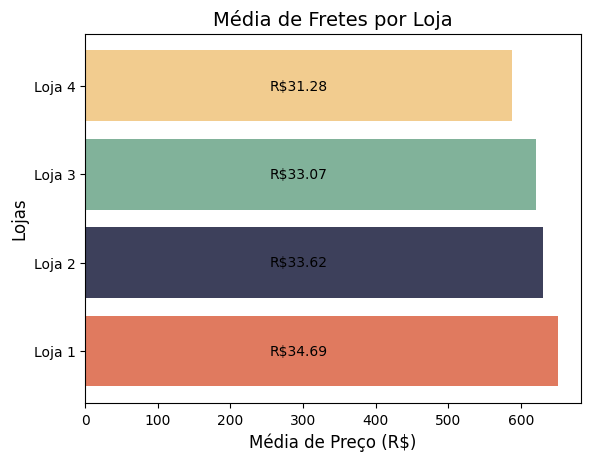

In [27]:
## Plot Média de frete
fretes = [Frete_media_L1, Frete_media_L2, Frete_media_L3, Frete_media_L4]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

plt.barh(lojas, medias, color=cores_lojas)

plt.title("Média de Fretes por Loja", fontsize=14)
plt.ylabel("Lojas", fontsize=12)
plt.xlabel("Média de Preço (R$)", fontsize=12)

for i, frete in enumerate(fretes):
  plt.text (media / 2, i, f"R${frete:.2f}", ha='center', va='center', color='black')

plt.show()

# **Relatório Final – Análise Comparativa das Lojas da AluraStore**

## 1. Introdução

Este relatório tem como objetivo indicar, com base em análises quantitativas descritivas, qual das quatro lojas virtuais da AluraStore apresenta o pior desempenho e, portanto, deve ser vendida pelo proprietário, Sr. João.

A investigação foi conduzida a partir de dados históricos de vendas, considerando os seguintes critérios:

- Faturamento bruto e líquido  
- Desempenho por categoria de produto  
- Média de avaliações dos clientes  
- Produtos mais e menos vendidos  
- Frete médio por loja  

As conclusões são fundamentadas em gráficos e tabelas construídos ao longo da análise exploratória no ambiente Google Colab.

---

## 2. Análise dos Resultados

### 2.1 Faturamento

- **Loja 1** apresentou os maiores valores de faturamento bruto e líquido.
- **Loja 4** teve o pior desempenho financeiro.
- Preço médio:
  - Loja 1: **R$ 650,49**

  - Loja 4: **R$ 587,15**

**Conclusão:** A Loja 1 demonstra maior retorno financeiro. A Loja 4, menor lucratividade.

---

### 2.2 Categorias de Produtos

- **Loja 1** se destaca nas categorias **eletrodomésticos** e **eletrônicos**.
- **Loja 3** tem maior concentração em **móveis** (21,15%).
- **Loja 4** concentra vendas em **brinquedos** e apresenta a menor participação em eletrodomésticos (10,77%).

**Conclusão:** A Loja 4 atua em categorias de menor valor agregado.

---

### 2.3 Avaliações dos Clientes

| Loja   | Média de Avaliação |
|--------|--------------------|
| Loja 3 | 4,05               |
| Loja 2 | 4,04               |
| Loja 4 | 4,00               |
| Loja 1 | 3,98               |

**Conclusão:** Diferença pequena entre as lojas. A avaliação não altera significativamente o peso dos demais indicadores.

---

### 2.4 Produtos Mais e Menos Vendidos

A tabela a seguir resume os produtos com maior e menor número de unidades vendidas por loja:

| Loja   | Produto Mais Vendido                          | Produto Menos Vendido                        |
|--------|-----------------------------------------------|----------------------------------------------|
| Loja 1 | Micro-ondas *(eletrodomésticos, 60 un.)*      | Celular ABXY *(eletrônicos, 33 un.)*         |
| Loja 2 | Iniciando em programação *(livros, 65 un.)*   | Jogo de tabuleiro *(brinquedos, 32 un.)*     |
| Loja 3 | Kit banquetas *(móveis, 57 un.)*              | Blocos de montar *(brinquedos, 35 un.)*      |
| Loja 4 | Cama box *(móveis, 62 un.)*                   | Guitarra *(instrumentos musicais, 33 un.)*   |

As quantidades mínimas de venda são semelhantes entre as lojas, variando de 32 a 35 unidades. Embora a **Loja 4** tenha como produto menos vendido um item da categoria *instrumentos musicais*, **não é possível concluir que há prejuízo em estoque** .

### 2.5 Frete Médio

- **Menor frete médio:** Loja 1  
- **Maior frete médio:** Loja 3  
- **Loja 4:** frete elevado, o que compromete ainda mais seu desempenho.

**Conclusão:** Loja 1 é mais eficiente logisticamente. Loja 4 tem custos logísticos relativamente altos.

---

## 3. Conclusão

Com base na análise realizada, **recomenda-se a venda da Loja 4**.  

### Justificativas:

- **Menor faturamento total (bruto e líquido)**
- **Menor preço médio**
- **Frete médio elevado**

Dessa forma, a manutenção das Lojas 1, 2 e 3 é recomendada, com destaque para a **Loja 1**, que apresentou o melhor desempenho geral, aliando rentabilidade, logística eficiente.

---
